# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#making the url to perform calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#creating an empty list
list_city=[]
record_count = 1
set_count = 1
#beginning print for data retrieval
print("Beginning Data Retrieval")
print("------------------------")
#beginning the for loop for calls
for i, city in enumerate(cities):
    if (i%50==0 and i>=50):
        set_count += 1
        record_count = 0
    print (f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count+=1
    city_url = url + "q=" + city
    try:
        response = requests.get(url+'&q='+ city).json()
        place=response['name']
        cloudiness=response["clouds"]["all"]
        country=response['sys']['country']
        date=response['dt']
        humidity=response["main"]['humidity']
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        max_temp=response["main"]['temp_max']
        windspeed=response['wind']['speed']
        list_city.append({'City':place,
                         'Cloudiness':cloudiness,
                         'Country':country,
                         'Date':date,
                         'Humidity':humidity,
                         'Lat':lat,
                         'Lng':lng,
                         'Max Temp':max_temp,
                         'Wind Speed':windspeed})
        
    
    except:
        print("no city")
response

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | coihueco
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | martapura
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | poum
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | nagar karnul
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | baker city
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | silver city
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | jalu
Processing Record 21 of Set 1 | soe
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | egvekinot
Processing

Processing Record 46 of Set 4 | roald
Processing Record 47 of Set 4 | aswan
Processing Record 48 of Set 4 | jiwani
Processing Record 49 of Set 4 | airai
Processing Record 0 of Set 5 | flinders
Processing Record 1 of Set 5 | kushiro
Processing Record 2 of Set 5 | tubruq
no city
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | ko samui
Processing Record 5 of Set 5 | atikokan
Processing Record 6 of Set 5 | porto novo
Processing Record 7 of Set 5 | kontagora
Processing Record 8 of Set 5 | namibe
Processing Record 9 of Set 5 | broken hill
Processing Record 10 of Set 5 | tezu
Processing Record 11 of Set 5 | lorengau
Processing Record 12 of Set 5 | zemio
Processing Record 13 of Set 5 | benemerito de las americas
Processing Record 14 of Set 5 | villa union
Processing Record 15 of Set 5 | waddan
Processing Record 16 of Set 5 | vila velha
Processing Record 17 of Set 5 | lisala
Processing Record 18 of Set 5 | nizwa
Processing Record 19 of Set 5 | vestmanna
Processing Record 

Processing Record 42 of Set 8 | sajanan
Processing Record 43 of Set 8 | sainte-rose
Processing Record 44 of Set 8 | tibu
Processing Record 45 of Set 8 | tyshkivka
Processing Record 46 of Set 8 | stokmarknes
Processing Record 47 of Set 8 | goteborg
no city
Processing Record 48 of Set 8 | paka
Processing Record 49 of Set 8 | makakilo city
Processing Record 0 of Set 9 | vao
Processing Record 1 of Set 9 | okha
Processing Record 2 of Set 9 | ponta delgada
Processing Record 3 of Set 9 | nioki
Processing Record 4 of Set 9 | warwick
Processing Record 5 of Set 9 | mys shmidta
no city
Processing Record 6 of Set 9 | les cayes
Processing Record 7 of Set 9 | griffith
Processing Record 8 of Set 9 | laguna
Processing Record 9 of Set 9 | honningsvag
Processing Record 10 of Set 9 | srednekolymsk
Processing Record 11 of Set 9 | goderich
Processing Record 12 of Set 9 | vestmannaeyjar
Processing Record 13 of Set 9 | jizan
Processing Record 14 of Set 9 | krasnoye
Processing Record 15 of Set 9 | port huenem

Processing Record 36 of Set 12 | ancud
Processing Record 37 of Set 12 | mahibadhoo
Processing Record 38 of Set 12 | agadir
Processing Record 39 of Set 12 | leua
Processing Record 40 of Set 12 | batticaloa
Processing Record 41 of Set 12 | tinogboc
Processing Record 42 of Set 12 | buenos aires
Processing Record 43 of Set 12 | bayir
Processing Record 44 of Set 12 | tibagi
Processing Record 45 of Set 12 | formosa
Processing Record 46 of Set 12 | bria
Processing Record 47 of Set 12 | mayor pablo lagerenza
Processing Record 48 of Set 12 | clyde river
Processing Record 49 of Set 12 | chicama
Processing Record 0 of Set 13 | iskateley
Processing Record 1 of Set 13 | olden
Processing Record 2 of Set 13 | ust-kulom
Processing Record 3 of Set 13 | san carlos
Processing Record 4 of Set 13 | saurimo
Processing Record 5 of Set 13 | acajutla
Processing Record 6 of Set 13 | coolum beach
Processing Record 7 of Set 13 | oranjestad
Processing Record 8 of Set 13 | ulladulla
Processing Record 9 of Set 13 | 

{'coord': {'lon': 72.64, 'lat': 10.57},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'model',
 'main': {'temp': 80.98,
  'feels_like': 86.18,
  'temp_min': 80.98,
  'temp_max': 80.98,
  'pressure': 1013,
  'humidity': 64,
  'sea_level': 1013,
  'grnd_level': 1013},
 'wind': {'speed': 2.28, 'deg': 200},
 'clouds': {'all': 100},
 'dt': 1580003335,
 'sys': {'country': 'IN', 'sunrise': 1580002364, 'sunset': 1580044235},
 'timezone': 19800,
 'id': 1267390,
 'name': 'Kavaratti',
 'cod': 200}

In [4]:
df=pd.DataFrame(list_city)
df.count()

City          582
Cloudiness    582
Country       582
Date          582
Humidity      582
Lat           582
Lng           582
Max Temp      582
Wind Speed    582
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#exporting data
df.to_csv("../output_data/rawdata.csv")

In [6]:
#viewing data
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coihueco,0,CL,1580003261,42,-36.62,-71.83,80.60,11.41
1,Kruisfontein,89,ZA,1580003261,87,-34.00,24.73,64.71,22.73
2,Martapura,40,ID,1580003161,88,-3.42,114.85,80.60,3.36
3,Alice Springs,0,AU,1580003146,11,-23.70,133.88,91.40,16.11
4,Poum,100,NC,1580003261,82,-20.23,164.02,79.77,21.39


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

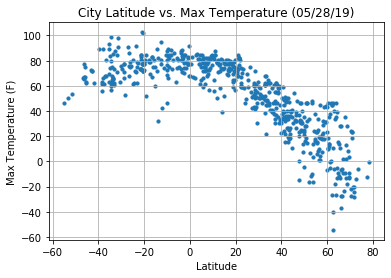

In [7]:
#creating scatter plot
plt.scatter(df["Lat"], df["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('CityLatitudevsMaxTemperature.png')
plt.show()

#### Latitude vs. Humidity Plot

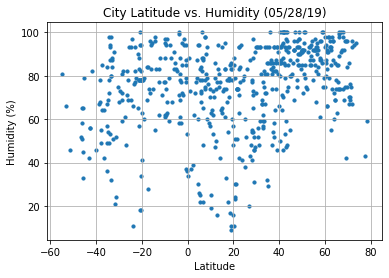

In [8]:
#creating scatter plot
plt.scatter(df["Lat"], df["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('CityLatitudevsHumidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

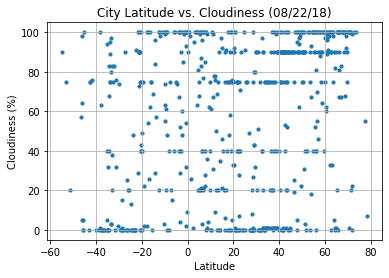

In [9]:
#creating scatter plot
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('CityLatitudevsCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

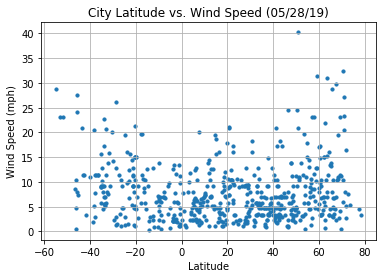

In [10]:
#creating scatter plot
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('CityLatitudevsWindSpeed.png')
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern=df.loc[df["Lat"] >= 0]
northern.to_csv("../output_data/northerndata.csv")
northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
6,Kapaa,40,US,1580002966,74,22.08,-159.32,80.60,10.29
7,Nagar Karnul,6,IN,1580003262,61,16.48,78.32,72.37,3.94
9,Baker City,90,US,1580003262,80,44.77,-117.83,41.00,4.70
10,Sao Filipe,21,CV,1580003262,63,14.90,-24.50,73.94,18.75
12,Nikolskoye,40,RU,1580003262,79,59.70,30.79,30.99,4.47


In [13]:
southern=df.loc[df["Lat"]<0]
southern.to_csv("../output_data/southerndata.csv")
southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coihueco,0,CL,1580003261,42,-36.62,-71.83,80.60,11.41
1,Kruisfontein,89,ZA,1580003261,87,-34.00,24.73,64.71,22.73
2,Martapura,40,ID,1580003161,88,-3.42,114.85,80.60,3.36
3,Alice Springs,0,AU,1580003146,11,-23.70,133.88,91.40,16.11
4,Poum,100,NC,1580003261,82,-20.23,164.02,79.77,21.39


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8648722511504701


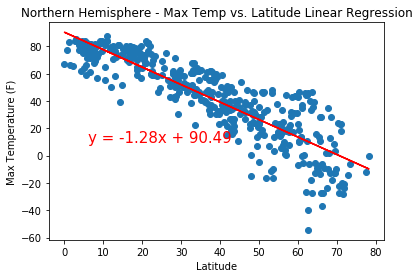

In [14]:
#linear regress on scatter plot
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('A.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3249871097537999


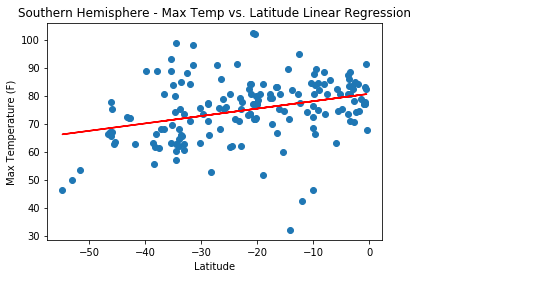

In [15]:
#linear regress on scatter plot
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('B.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38907349457151064


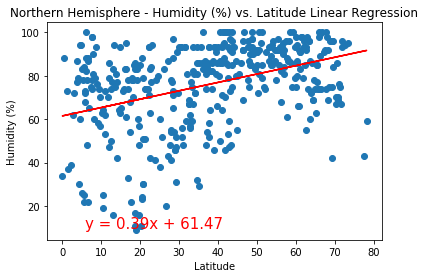

In [16]:
#linear regress on scatter plot
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('C.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2954050828319218


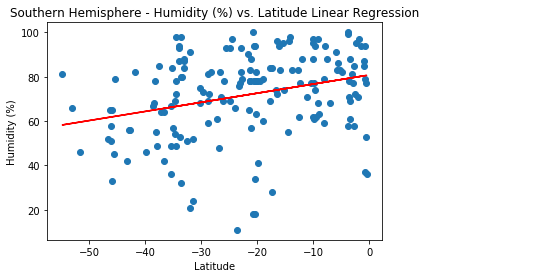

In [17]:
#linear regress on scatter plot
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig('D.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2442848835863815


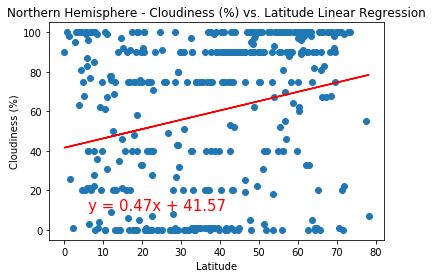

In [18]:
#linear regress on scatter plot
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('E.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2621348812804249


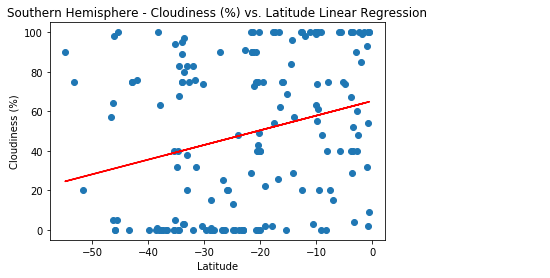

In [19]:
#linear regress on scatter plot
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('F.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2178735800313392


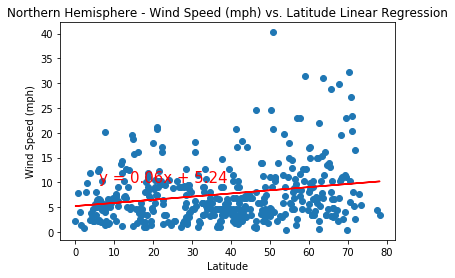

In [20]:
#linear regress on scatter plot
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('G.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4152713470919032


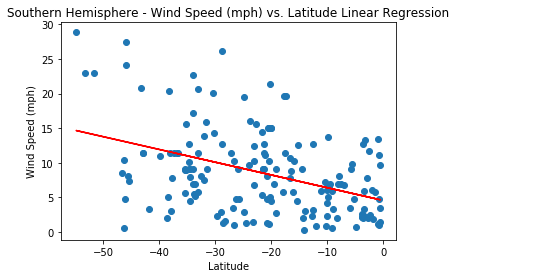

In [21]:
#linear regress on scatter plot
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('H.png')
plt.show()

In [22]:
# Observations
# From the charts the higher temperatures tend to be between -20 and 0 latitude. 
# Humidity is pretty even throughout latitudes.
# Windspeed is generally less than 20 mph and majority is less than 10 mph.
# There is a strong relationship viewed in the Northern Max Temp vs. Lat.